# Create datasets


In [3]:
#%load_ext tensorboard
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime
from copy import deepcopy
import math
import pickle
import scipy.io as sio
import sklearn.datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import iqr
from sklearn.utils import check_random_state

tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

# Mount Google Drive
from google.colab import drive, files
import sys
drive.mount('/content/drive', force_remount = True)

sys.path.append('/content/drive/MyDrive/DeepAtlas')
from PCAE import PCAE, Chart, Gating_network




Mounted at /content/drive


## Sphere (uniform)

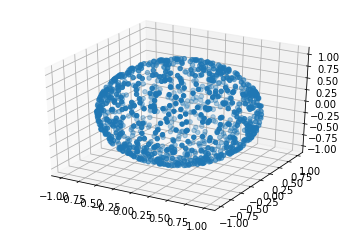

In [ ]:
noise = 0.0

# Generate the data
uniform_sphere_training_data = []
uniform_sphere_test_data = []
for i in range(1000):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  uniform_sphere_training_data.append(x)

for i in range(3000):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  uniform_sphere_test_data.append(x)

uniform_sphere_training_data = np.array(uniform_sphere_training_data)
uniform_sphere_test_data = np.array(uniform_sphere_test_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/uniform_sphere_data',\
         training_data = uniform_sphere_training_data, test_data = uniform_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(uniform_sphere_training_data[:,0], uniform_sphere_training_data[:,1], uniform_sphere_training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')




## Sphere (grid)


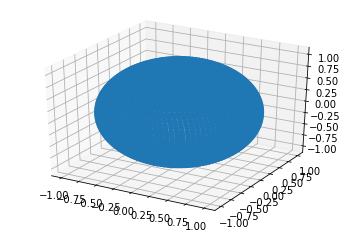

In [ ]:
# Not meant to be used for actual experiments
noise = 0.0

# Generate the data
x_grid=[]
y_grid=[]
z_grid=[]
N= 50
for j in np.linspace(0.0, np.pi, num=N):
  for i in np.linspace(0.0, 2*np.pi, num=round(1+N*(np.sin(j) +1))):
    x_grid.append(np.sin(j) * np.cos(i))
    y_grid.append(np.sin(j) * np.sin(i))
    z_grid.append(np.cos(j))


grid_sphere_training_data =  np.array([x_grid, y_grid, z_grid]).T
grid_sphere_test_data = np.array([x_grid, y_grid, z_grid]).T


# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/grid_sphere_data',\
         training_data = grid_sphere_training_data, test_data = grid_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(grid_sphere_training_data[:,0], grid_sphere_training_data[:,1], grid_sphere_training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')


## Swiss roll


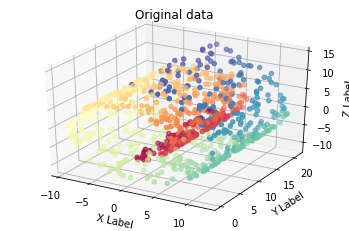

In [ ]:
noise = 0.0
(swiss_roll_training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)
(swiss_roll_test_data,color_test) = sklearn.datasets.make_swiss_roll(n_samples = 3000, noise = noise)


# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss_roll_training_data[:, 0], swiss_roll_training_data[:, 1], swiss_roll_training_data[:, 2], c=color_training, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/swiss_roll_data',\
         training_data = swiss_roll_training_data, test_data = swiss_roll_test_data)



## Pierced swiss roll

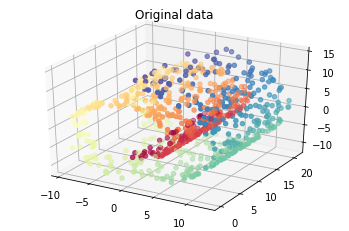

In [ ]:
noise = 0.0
(swiss_roll_training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)
(swiss_roll_test_data,color_test) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)

pierced_swiss_roll_training_data = []
pierced_swiss_roll_test_data = []
pierced_color_training = []
for index, x in enumerate(swiss_roll_training_data):
  if not (x[0]<-5 and 5<x[1]<15):
    pierced_swiss_roll_training_data.append(x)
    pierced_color_training.append(color_training[index])
for x in swiss_roll_test_data:
  if not (x[0]<-5 and 4<x[1]<6):
    pierced_swiss_roll_test_data.append(x)

pierced_swiss_roll_test_data = np.array(pierced_swiss_roll_test_data)    
pierced_swiss_roll_training_data = np.array(pierced_swiss_roll_training_data)

# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pierced_swiss_roll_training_data[:, 0], pierced_swiss_roll_training_data[:, 1], pierced_swiss_roll_training_data[:, 2], c=pierced_color_training, cmap=plt.cm.Spectral)
ax.set_title("Original data")



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/pierced_swiss_roll_data',\
         training_data = pierced_swiss_roll_training_data, test_data = pierced_swiss_roll_test_data)


## Torus

(1000, 3)


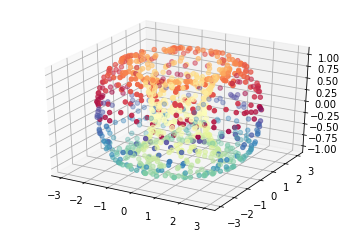

In [ ]:
noise = 0.0

torus_training_data = []
torus_test_data = []
color_training = []

# Create the torus
N = 2000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [(np.cos(t) + 2)  * np.cos(p), \
      (np.cos(t) + 2)* np.sin(p), \
      np.sin(t)] +\
      np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  if i<N/2:
    torus_training_data.append(x)
    color_training.append(t)
  else:
    torus_test_data.append(x)

torus_training_data = np.array(torus_training_data)
torus_test_data = np.array(torus_test_data)
# Needed to modify the way figure behaves
Axes3D


print(np.shape(torus_training_data))
# Plot dataset 
# TODO: problem with the color
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(torus_training_data[:,0], torus_training_data[:,1], torus_training_data[:,2],c=color_training, cmap=plt.cm.Spectral)



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/torus_data',\
         training_data = torus_training_data, test_data = torus_test_data)



    

## Klein bottle


(1000, 4)


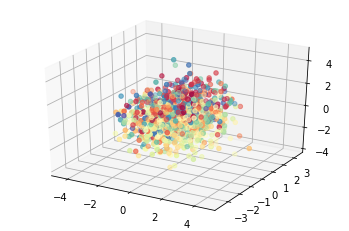

In [ ]:
noise = 0.0

Klein_bottle_training_data = []
Klein_bottle_test_data = []
color_training = []

R=1
P=1
epsilon = 0.5
# Create the Klein bottle
N = 2000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [R*(np.cos(t/2)* np.cos(p) - np.sin(t/2)*np.sin(2*p)), \
      R*(np.sin(t/2)* np.cos(p) + np.cos(t/2)*np.sin(2*p)), \
      P*np.cos(t)*(1+epsilon*np.sin(p)),\
      P*np.sin(t)*(1+epsilon*np.sin(p))]  +\
      np.random.multivariate_normal(np.zeros(4),np.identity(4))
  if i<N/2:
    Klein_bottle_training_data.append(x)
    color_training.append(t)
  else:
    Klein_bottle_test_data.append(x)

Klein_bottle_training_data = np.array(Klein_bottle_training_data)
Klein_bottle_test_data = np.array(Klein_bottle_test_data)
# Needed to modify the way figure behaves
Axes3D


print(np.shape(Klein_bottle_training_data))
# Plot dataset 
# TODO: problem with the color
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Klein_bottle_training_data[:,0], Klein_bottle_training_data[:,1], Klein_bottle_training_data[:,2],c=color_training, cmap=plt.cm.Spectral)



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/Klein_bottle_data',\
         training_data = Klein_bottle_training_data, test_data = Klein_bottle_test_data)



    

## Concentric circles

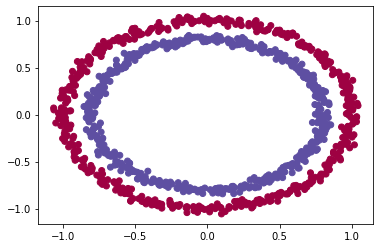

In [ ]:
noise = 0.025
n_samples = 1000
(conc_circles_training_data,color_training) = sklearn.datasets.make_circles(n_samples=n_samples,  shuffle=True, noise=noise, random_state=None, factor=0.8)
(conc_circles_test_data,color_test) = sklearn.datasets.make_circles(n_samples=3*n_samples,  shuffle=True, noise=noise, random_state=None, factor=0.8)

# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(conc_circles_training_data[:, 0], conc_circles_training_data[:, 1], c= color_training, cmap=plt.cm.Spectral)




# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/conc_circles_data',\
         training_data = conc_circles_training_data, test_data = conc_circles_test_data)



## Higher dimensional sphere

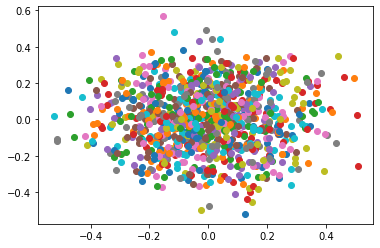

In [ ]:
noise = 0.005
dim = 40
ambient_dim = 80
n_samples = 2000

A1 =np.concatenate((np.identity(dim+1),np.zeros([dim+1,ambient_dim-dim-1])),axis = 1)
A2 = np.concatenate((np.zeros([ambient_dim-dim-1,dim+1]), np.zeros([ambient_dim-dim-1,ambient_dim-dim-1])),axis = 1)
Cov = np.concatenate((A1,A2))

# Generate the data
uniform_sphere_training_data = []
uniform_sphere_test_data = []
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(ambient_dim),Cov)
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal(np.zeros(ambient_dim),noise*np.identity(ambient_dim))
  if i<n_samples/2:
    uniform_sphere_training_data.append(x)
  else:
    uniform_sphere_test_data.append(x)

uniform_sphere_test_data = np.array(uniform_sphere_test_data)
uniform_sphere_training_data = np.array(uniform_sphere_training_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/uniform_sphere_dim_'+str(dim)+'_data',\
         training_data = uniform_sphere_training_data, test_data = uniform_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
for x in uniform_sphere_training_data:
  ax.scatter(x[0], x[1])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')




## Gaussian manifold


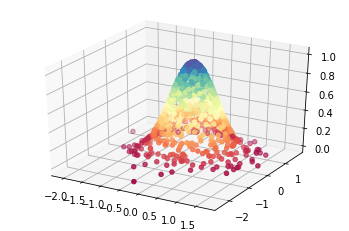

In [ ]:
from matplotlib import cm

noise = 0.0
n_samples = 2000
c = 0.3

# Generate the data
Gaussian_manifold_training_data = []
Gaussian_manifold_test_data = []
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(2),c*np.identity(2))
  z = np.exp(-0.5/c*np.inner(x, x))

  x = np.concatenate((x,[z]))
  x += np.random.multivariate_normal(np.zeros(3),noise*np.identity(3))
  if i<n_samples/2:
    Gaussian_manifold_training_data.append(x)
  else:
    Gaussian_manifold_test_data.append(x)

Gaussian_manifold_training_data = np.array(Gaussian_manifold_training_data)
Gaussian_manifold_test_data = np.array(Gaussian_manifold_test_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/Gaussian_manifold_data',\
         training_data = Gaussian_manifold_training_data, test_data = Gaussian_manifold_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
a x.scatter(Gaussian_manifold_training_data[:,0], Gaussian_manifold_training_data[:,1], Gaussian_manifold_training_data[:,2], c = Gaussian_manifold_training_data[:,2], cmap=plt.cm.Spectral)

  
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')



## dumb dataset

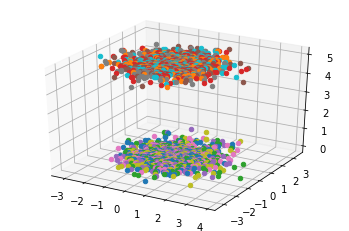

In [ ]:

# Generate the data
dumb_training_data = []
dumb_test_data = []
for i in range(2000):
  x = np.concatenate((np.random.multivariate_normal([0,0],[[1,0],[0,1.]]),[0]))
  x2 = np.concatenate((np.random.multivariate_normal([0,0],[[1,0],[0,1.]]),[5]))
  if i<1000:
    dumb_training_data.append(x)
    dumb_training_data.append(x2)
  else:
    dumb_test_data.append(x)
    dumb_test_data.append(x2)

dumb_training_data = np.array(dumb_training_data)
dumb_test_data = np.array(dumb_test_data)
# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/dumb_data',\
         training_data = dumb_training_data, test_data =dumb_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
for x in dumb_training_data:
  ax.scatter(x[0], x[1],x[2])


## V lines



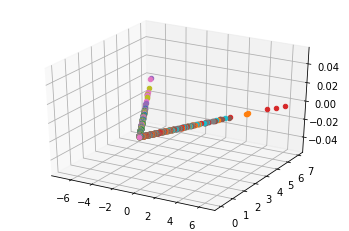

In [ ]:

# Generate the data
v_training_data = []
v_test_data = []
for i in range(1000):
  x = np.concatenate((np.random.exponential()*np.array([-1,1]),[0]))
  x2 = np.concatenate((np.random.exponential()*np.array([1,1]),[0]))
  if i<500:
    v_training_data.append(x)
    v_training_data.append(x2)
  else:
    v_test_data.append(x)
    v_test_data.append(x2)

v_training_data = np.array(v_training_data)
v_test_data = np.array(v_test_data)
# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/v_data',\
         training_data = v_training_data, test_data =v_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
for x in v_training_data:
  ax.scatter(x[0], x[1])


## MNIST


In [ ]:

dataset_name = "mnist"
x_train, x_test = tfds.load("mnist", 
                            split=['train', 'test'], 
                            shuffle_files=True,
                            batch_size=-1, as_supervised = True) # i know this looks weird, but we need it

points_train = np.reshape(x_train[0].numpy().astype("float32"), [np.shape(x_train[0].numpy())[0],784])
labels_train = x_train[1].numpy()
points_test = np.reshape(x_test[0].numpy().astype("float32") , [np.shape(x_test[0].numpy())[0],784])
labels_test = x_test[1].numpy()


np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset_name+'_data',\
         training_data = points_train, test_data = points_test, training_labels = labels_train, test_labels = labels_test)


In [ ]:
npzfile = np.load('/content/drive/MyDrive/DeepAtlas/Datasets/mnist_data.npz')
training_data = npzfile["training_data"]
training_labels = npzfile["training_labels"]
test_data = npzfile["test_data"]
test_labels = npzfile["test_labels"]


In [ ]:
# MNIST SEPARATED BY LABEL

dataset_name = "mnist"
x_train, x_test = tfds.load("mnist", 
                            split=['train', 'test'], 
                            shuffle_files=True,
                            batch_size=-1, as_supervised = True) # i know this looks weird, but we need it

points_train = np.reshape(x_train[0].numpy().astype("float32"), [np.shape(x_train[0].numpy())[0],784])
labels_train = x_train[1].numpy()
points_test = np.reshape(x_test[0].numpy().astype("float32") , [np.shape(x_test[0].numpy())[0],784])
labels_test = x_test[1].numpy()


for i in range(10):
  points_train_class_i = [x for index,x in enumerate(points_train) if labels_train[index]==i]
  points_test_class_i = [x for index,x in enumerate(points_test) if labels_test[index]==i]
  print(len(points_test_class_i))
  np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset_name+'_class'+str(i)+'only_data',\
         training_data = points_train_class_i, test_data = points_test_class_i)


980
1135
1032
1010
982
892
958
1028
974
1009


## Sphere union torus

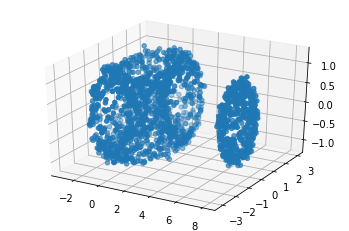

In [ ]:
noise = 0.005

training_data = []
test_data = []
color_training = []

# Create the torus
N = 3000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [(np.cos(t) + 2)  * np.cos(p), \
      (np.cos(t) + 2)* np.sin(p), \
      np.sin(t)] +\
      np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  if i<N/2:
    training_data.append(x)
    color_training.append(t)
  else:
    test_data.append(x)
N=1000
# Create the sphere
for i in range(N):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += [7,0,0]+np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  if i<N/2:
    training_data.append(x)
    color_training.append(t)
  else:
    test_data.append(x)

training_data = np.array(training_data)
test_data = np.array(test_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/torus_sphere_data',\
         training_data = training_data, test_data = test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')


## Yale Faces


54
10
54
10
54
10
54
10
54
10
54
10
54
10
54
10
54
10
54
10
(540, 2500)
(540,)
(100, 2500)
(100,)


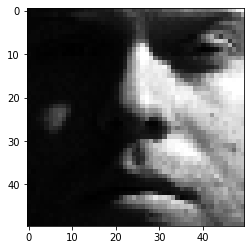

In [ ]:
import imageio
import matplotlib.cm as cm
#%matplotlib inline

dataset_name = "yale_faces"

location = '/content/drive/MyDrive/DeepAtlas/Datasets/'

train_labels, train_data = [], []
for line in open(location+'Yale_faces_preparation/train.txt'):
    im = imageio.imread(location+'Yale_faces_preparation/images/'+line.strip().split()[0].split("/")[-1])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)


test_labels, test_data = [], []
for line in open(location+'Yale_faces_preparation/test.txt'):
    im = imageio.imread(location+'Yale_faces_preparation/images/'+line.strip().split()[0].split("/")[-1])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)



for i in range(1,11):
  train_class_i = [x for index,x in enumerate(train_data) if train_labels[index]==i]
  test_class_i = [x for index,x in enumerate(test_data) if test_labels[index]==i]
  np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset_name+'_class'+str(i-1)+'only_data',\
         training_data = train_class_i, test_data = test_class_i)
  print(len(train_class_i))
  print(len(test_class_i))

np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset_name+'_data',\
         training_data = train_data, test_data = test_data, training_labels = train_labels, test_labels = test_labels)


print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
plt.imshow(train_data[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [ ]:
v =[0,10,-200,35, 78]
print(np.quantile(v,0.8))

43.60000000000001


## Higgs


In [ ]:
dataset_name = "higgs"
x_train = tfds.load("higgs", 
                            shuffle_files=True,
                            batch_size=-1,  split="test", as_supervised = True) # i know this looks weird, but we need it
x_train = x_train[0:20000]
x_test = x_test[20000:40000]

KeyboardInterrupt: ignored

In [ ]:


points_train = np.reshape(x_train[0].numpy().astype("float32"), [np.shape(x_train[0].numpy())[0],784])
labels_train = x_train[1].numpy()
points_test = np.reshape(x_test[0].numpy().astype("float32") , [np.shape(x_test[0].numpy())[0],784])
labels_test = x_test[1].numpy()


np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/'+dataset_name+'_data',\
         training_data = points_train, test_data = points_test, training_labels = labels_train, test_labels = labels_test)


KeyboardInterrupt: ignored

# Datasets for classification


## Adding labels to the Swiss roll


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2000
2000
3000
3000


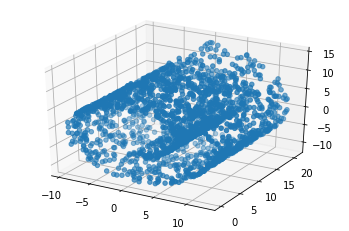

In [ ]:
noise = 0.05
(training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = 2000, noise = noise)
(test_data,color_test) = sklearn.datasets.make_swiss_roll(n_samples = 3000, noise = noise)

training_labels = []
test_labels = []

for index, x in enumerate(training_data):
  p1 = np.exp(-0.5/4*np.linalg.norm(x-[-1,3,-2])**2)/(2*np.pi*8)
  p2 = np.exp(-0.5/9*np.linalg.norm(x-[10,10,0])**2)/(2*np.pi*3**3)
  p3 = np.exp(-0.5/0.25*np.linalg.norm(color_training[index]-6)**2)/(2*np.pi*0.5)
  p4 = 200*np.exp(-0.5/1*np.linalg.norm(x[0]-x[1]+color_training[index]*0.5-10)**2)/(2*np.pi*1**(3/2))
  unnormalized_probabilities = [p1,p2,p3,p4]
  probabilities = unnormalized_probabilities/np.sum(unnormalized_probabilities)
  label = np.random.choice([1,2,3,4],p = probabilities)
  training_labels.append(label)

for index, x in enumerate(test_data):
  p1 = np.exp(-0.5/4*np.linalg.norm(x-[-1,3,-2])**2)/(2*np.pi*8)
  p2 = np.exp(-0.5/9*np.linalg.norm(x-[10,10,0])**2)/(2*np.pi*3**3)
  p3 = np.exp(-0.5/0.25*np.linalg.norm(color_test[index]-6)**2)/(2*np.pi*0.5)
  p4 = 200*np.exp(-0.5/1*np.linalg.norm(x[0]-x[1]+color_test[index]*0.5-10)**2)/(2*np.pi*1**(3/2))
  unnormalized_probabilities = [p1,p2,p3,p4]
  probabilities = unnormalized_probabilities/np.sum(unnormalized_probabilities)
  label = np.random.choice([1,2,3,4],p = probabilities)
  test_labels.append(label)

# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/swiss_roll_data',\
         training_data = training_data, training_labels = training_labels, test_data = test_data, test_labels = test_labels)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')



dataset_matlab = {"test_data": test_data,\
        "training_data": training_data,\
        "training_labels": training_labels, \
        "test_labels": test_labels}
# Downloads the results as .mat files on the local machine, as well as numpy archives on Google Drive
sio.savemat("swiss_roll.mat",dataset_matlab)
files.download("swiss_roll.mat")


print(len(training_data))

print(len(training_labels))

print(len(test_data))

print(len(test_data))

## Adding labels to Sphere union torus


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

757
649
282
1408
404


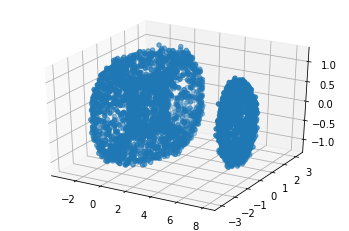

In [ ]:
noise = 0.005

training_data = []
training_labels = []
test_data = []
test_labels = []
color_training = []

# Create the torus
N = 5000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [(np.cos(t) + 2)  * np.cos(p), \
      (np.cos(t) + 2)* np.sin(p), \
      np.sin(t)] +\
      np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  p1 = np.exp(-0.5/4*np.linalg.norm(x-[-1,3,-2])**2)/(2*np.pi*8)
  p2 = 2*np.exp(-0.5*np.linalg.norm(x-[5,0.5,1])**2)/(2*np.pi)
  p3 = 1.2*np.exp(-0.5/0.25*np.linalg.norm(x-[2,-0.2,-1])**2)/(2*np.pi*0.125)
  p4 = 0.4*np.exp(-0.5/0.5*np.linalg.norm(t-2)**2)/(2*np.pi*0.5**(3/2))
  unnormalized_probabilities = [p1,p2,p3,p4]
  probabilities = unnormalized_probabilities/np.sum(unnormalized_probabilities)
  label = np.random.choice([1,2,3,4],p = probabilities)

  if i<N/2:
    training_data.append(x)
    training_labels.append(label)
    color_training.append(t)
  else:
    test_data.append(x)
    test_labels.append(label)


N=2000
# Create the sphere
for i in range(N):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += [7,0,0]+np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  p1 = np.exp(-0.5/4*np.linalg.norm(x-[-1,3,-2])**2)/(2*np.pi*8)
  p2 = 2*np.exp(-0.5*np.linalg.norm(x-[5,0.5,1])**2)/(2*np.pi)
  p3 = 1.2*np.exp(-0.5/0.25*np.linalg.norm(x-[2,-0.2,-1])**2)/(2*np.pi*0.125)
  p4 = 0.6*np.exp(-0.5/0.01*np.linalg.norm(x[2]-0.5)**2)/(2*np.pi*0.01**(1.5))
  unnormalized_probabilities = [p1,p2,p3,p4]
  probabilities = unnormalized_probabilities/np.sum(unnormalized_probabilities)
  label = np.random.choice([1,2,3,5],p = probabilities)

  if i<N/2:
    training_data.append(x)
    training_labels.append(label)
    color_training.append(t)
  else:
    test_data.append(x)
    test_labels.append(label)



training_data = np.array(training_data)
test_data = np.array(test_data)

# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/torus_sphere_data',\
         training_data = training_data, training_labels = training_labels, test_data = test_data, test_labels = test_labels)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')



dataset_matlab = {"test_data": test_data,\
        "training_data": training_data,\
        "training_labels": training_labels, \
        "test_labels": test_labels}
# Downloads the results as .mat files on the local machine, as well as numpy archives on Google Drive
sio.savemat("sphere_union_torus.mat",dataset_matlab)
files.download("sphere_union_torus.mat")


print(len([label for label in training_labels if label==1]))

print(len([label for label in training_labels if label==2]))

print(len([label for label in training_labels if label==3]))

print(len([label for label in training_labels if label==4]))

print(len([label for label in training_labels if label==5]))

## Adding labels to the higher dimensional sphere


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

146
582
272


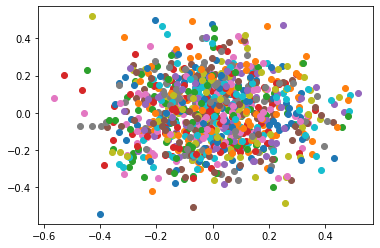

In [ ]:
noise = 0.005
dim = 40
ambient_dim = 80
n_samples = 2000

A1 =np.concatenate((np.identity(dim+1),np.zeros([dim+1,ambient_dim-dim-1])),axis = 1)
A2 = np.concatenate((np.zeros([ambient_dim-dim-1,dim+1]), np.zeros([ambient_dim-dim-1,ambient_dim-dim-1])),axis = 1)
Cov = np.concatenate((A1,A2))

# Generate the data
uniform_sphere_training_data = []
uniform_sphere_test_data = []
training_labels =[]
test_labels = []
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(ambient_dim),Cov)
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal(np.zeros(ambient_dim),noise*np.identity(ambient_dim))
  p1 = 30*np.exp(-0.5*1**2*np.linalg.norm(x-np.ones(ambient_dim))**2)/(2*np.pi*1**1.5)
  p2 = 300*np.exp(-0.5*np.linalg.norm(x+np.ones(ambient_dim))**2)/(2*np.pi)
  p3 = np.exp(-0.5/0.01**2*np.linalg.norm(x[4]-x[12]+0.5*x[15])**2)/(2*np.pi*0.01**1.5)
  unnormalized_probabilities = [p1,p2,p3]
  probabilities = unnormalized_probabilities/np.sum(unnormalized_probabilities)
  label = np.random.choice([1,2,3],p = probabilities)

  if i<n_samples/2:
    uniform_sphere_training_data.append(x)
    training_labels.append(label)
  else:
    uniform_sphere_test_data.append(x)
    test_labels.append(label)

uniform_sphere_test_data = np.array(uniform_sphere_test_data)
uniform_sphere_training_data = np.array(uniform_sphere_training_data)

# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/uniform_sphere_dim_'+str(dim)+'_data',\
         training_data = uniform_sphere_training_data, training_labels = training_labels, test_data = uniform_sphere_test_data, test_labels =test_labels)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
for x in uniform_sphere_training_data:
  ax.scatter(x[0], x[1])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

dataset_matlab = {"test_data": test_data,\
        "training_data": training_data,\
        "training_labels": training_labels, \
        "test_labels": test_labels}
# Downloads the results as .mat files on the local machine, as well as numpy archives on Google Drive
sio.savemat("higher_dimensional_sphere.mat",dataset_matlab)
files.download("higher_dimensional_sphere.mat")


print(len([label for label in training_labels if label==1]))

print(len([label for label in training_labels if label==2]))

print(len([label for label in training_labels if label==3]))

#       Dataset of UAD

## Swiss roll

(3800, 3)
4000
4000


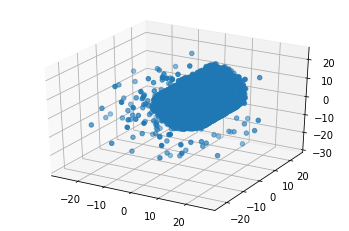

In [ ]:
noise = 0.05
n_samples = 3800
n_anomalies = 200
(training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = n_samples, noise = noise)
training_labels = [0]*n_samples
print(np.shape(training_data))
# sample anomalies
for i in range(n_anomalies):
  x = np.random.multivariate_normal([0,0,0],[[100,0,0],[0,100,0],[0,0,100]])
  training_data = np.append(training_data,[x],axis = 0)
  training_labels.append(1)

print(len(training_labels))
print(len(training_data))

# SHUFFLE
training_data = np.array(training_data)
training_labels = np.array(training_labels)
perm = np.random.permutation(len(training_data))
training_data = training_data[perm]
training_labels = training_labels[perm]

# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/swiss_roll_anomaly_data',\
         training_data = training_data, training_labels = training_labels , test_data = training_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')



## Sphere union torus

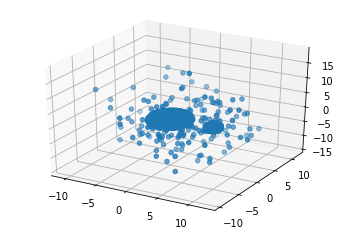

In [13]:
noise = 0.005

training_data = []
training_labels = []


# Create the torus
N = 3000-150

for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [(np.cos(t) + 2)  * np.cos(p), \
      (np.cos(t) + 2)* np.sin(p), \
      np.sin(t)] +\
      np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  training_data.append(x)

N=1000-50

# Create the sphere
for i in range(N):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += [7,0,0]+np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  training_data.append(x)
  
training_labels = [0]*3800

n_anomalies = 200

for i in range(n_anomalies):
  x = np.random.multivariate_normal([3,0,0],[[20,0,0],[0,20,0],[0,0,20]])
  training_data.append(x)
  training_labels.append(1)


# SHUFFLE
training_data = np.array(training_data)
training_labels = np.array(training_labels)
perm = np.random.permutation(len(training_data))
training_data = training_data[perm]
training_labels = training_labels[perm]


# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/torus_sphere_anomaly_data',\
         training_data = training_data, training_labels = training_labels , test_data = training_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')


In [11]:
print(np.sum([1 if label==1 else 0 for label in training_labels]))

200


## Higher dimensional sphere

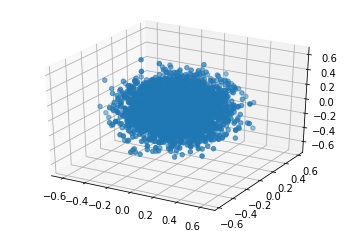

In [18]:
noise = 0.005
dim = 40
ambient_dim = 80
n_samples = 3800

A1 =np.concatenate((np.identity(dim+1),np.zeros([dim+1,ambient_dim-dim-1])),axis = 1)
A2 = np.concatenate((np.zeros([ambient_dim-dim-1,dim+1]), np.zeros([ambient_dim-dim-1,ambient_dim-dim-1])),axis = 1)
Cov = np.concatenate((A1,A2))

# Generate the data
training_data = []
training_labels =[]
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(ambient_dim),Cov)
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal(np.zeros(ambient_dim),noise*np.identity(ambient_dim))
  training_data.append(x)


training_labels = [0]*n_samples

n_anomalies = 200

for i in range(n_anomalies):
  x = np.random.multivariate_normal(np.zeros(ambient_dim),Cov)
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal(np.zeros(ambient_dim),0.005*np.identity(ambient_dim))
  training_data.append(x)
  training_labels.append(1)


# SHUFFLE
training_data = np.array(training_data)
training_labels = np.array(training_labels)
perm = np.random.permutation(len(training_data))
training_data = training_data[perm]
training_labels = training_labels[perm]

# Save the data
np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/uniform_sphere_dim_'+str(dim)+'_anomaly_data',\
         training_data = training_data, training_labels = training_labels , test_data = training_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')


## MNIST

In [ ]:

dataset_name = "mnist"
x_train, x_test = tfds.load("mnist", 
                            split=['train', 'test'], 
                            shuffle_files=True,
                            batch_size=-1, as_supervised = True) # i know this looks weird, but we need it


points_train = np.reshape(x_train[0].numpy().astype("float32"), [np.shape(x_train[0].numpy())[0],784])
labels_train = x_train[1].numpy()

training_data_per_class = []
for i in range(10):
  training_data_class_i = [x for index, x in enumerate(points_train) if labels_train[index]==i]
  training_data_per_class.append(training_data_class_i)

# make the first 3 classes the data
training_data = np.concatenate((np.array(training_data_per_class[0]),np.array(training_data_per_class[1]),np.array(training_data_per_class[2])))
np.random.shuffle(training_data)
training_data = training_data[:18000]
training_labels = [0]*len(training_data)

# the other classes are the anomaly
n_anomalies= 947
anomalies = np.array(training_data_per_class[3])
for i in range(4,10):
  anomalies = np.concatenate((anomalies,np.array(training_data_per_class[i])))
np.random.shuffle(anomalies)
anomalies = anomalies[0:n_anomalies]

# mix the two
training_data = np.concatenate((training_data,anomalies))
training_labels = np.array(training_labels+[1]*n_anomalies)

# SHUFFLE
perm = np.random.permutation(len(training_data))
training_data = training_data[perm]
training_labels = training_labels[perm]


np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset_name+'_anomaly_data',\
        training_data = training_data,  training_labels = training_labels  , test_data = training_data)


## Yale Face B

In [16]:

dataset = "yale_faces"


npzfile = np.load('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset+'_data.npz')
training_data = npzfile["training_data"]
training_labels = npzfile["training_labels"]


training_data_per_class = []
for i in range(10):
  training_data_class_i = [x for index, x in enumerate(training_data) if training_labels[index]==i+1]
  training_data_per_class.append(training_data_class_i)

# make the first 9 classes the data
training_data = np.array(training_data_per_class[0])
for i in range(1,9):
  training_data = np.concatenate((training_data,np.array(training_data_per_class[i])))
np.random.shuffle(training_data)
training_labels = [0]*len(training_data)

# the last class are the anomaly
anomalies = np.array(training_data_per_class[9])
np.random.shuffle(anomalies)

# mix the two
training_data = np.concatenate((training_data,anomalies))
training_labels = np.array(training_labels+[1]*len(anomalies))

# SHUFFLE
perm = np.random.permutation(len(training_data))
training_data = training_data[perm]
training_labels = training_labels[perm]


np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/'+dataset+'_anomaly_data',\
        training_data = training_data,  training_labels = training_labels  , test_data = training_data)


##Higgs

In [ ]:




npzfile = np.load('/content/drive/MyDrive/DeepAtlas/Datasets/higgs_data.npz')
training_data = npzfile["training_data"]
training_labels = npzfile["training_labels"]


training_data_per_class = []
for i in range(2):
  training_data_class_i = [x for index, x in enumerate(training_data) if training_labels[index]==i]
  training_data_per_class.append(training_data_class_i)

for i in range(2):
  training_data = training_data_per_class[i][0:18000]
  anomalies = training_data_per_class[1-i][0:947]
  # mix the two
  training_data = np.concatenate((training_data,anomalies))
  training_labels = np.concatenate(([0]*18000,[1]*947))

  # SHUFFLE
  perm = np.random.permutation(len(training_data))
  training_data = training_data[perm]
  training_labels = training_labels[perm]
  
  np.savez('/content/drive/MyDrive/DeepAtlas/Datasets/higgs'+str(i+1)+'_anomaly_data',\
          training_data = training_data,  training_labels = training_labels  , test_data = training_data)

